###    (Profile of the  Coupon Dataset using Pandas_Profiling Library)



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas_profiling
from  pandas_profiling import ProfileReport

In [2]:
# importing the sys module
import sys

# the setrecursionlimit function is
# to modify the default recursion limit set by python. Using this,
# Increased to make notebook load properly
sys.setrecursionlimit(10**6)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#dimensions of the datframe

data.shape

(12684, 26)

In [6]:
#start with some libraries needed
import plotly.express as px

In [7]:
#Check the series data for unique values 

for col in data.columns:
    print('')
    print("{} column has {} unique values".format(col,data[col].nunique()))


destination column has 3 unique values

passanger column has 4 unique values

weather column has 3 unique values

temperature column has 3 unique values

time column has 5 unique values

coupon column has 5 unique values

expiration column has 2 unique values

gender column has 2 unique values

age column has 8 unique values

maritalStatus column has 5 unique values

has_children column has 2 unique values

education column has 6 unique values

occupation column has 25 unique values

income column has 9 unique values

car column has 5 unique values

Bar column has 5 unique values

CoffeeHouse column has 5 unique values

CarryAway column has 5 unique values

RestaurantLessThan20 column has 5 unique values

Restaurant20To50 column has 5 unique values

toCoupon_GEQ5min column has 1 unique values

toCoupon_GEQ15min column has 2 unique values

toCoupon_GEQ25min column has 2 unique values

direction_same column has 2 unique values

direction_opp column has 2 unique values

Y column has 2 un

In [8]:
data['Y'].unique()

array([1, 0], dtype=int64)

In [9]:
analyze=data.rename(columns={"Y":"coupon_redeem_status"})
analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [10]:
#Examine the  numerical data in the data frame 

numerical_values = data.select_dtypes(include = ['int64'])

numerical_values.head(3).T


,0,1,2
temperature,55,80,80
has_children,1,1,1
toCoupon_GEQ5min,1,1,1
toCoupon_GEQ15min,0,0,1
toCoupon_GEQ25min,0,0,0
direction_same,0,0,0
direction_opp,1,1,1
Y,1,0,1


Number of Columns with missing values:  6  names of features:  ['car' 'Bar' 'CoffeeHouse' 'CarryAway' 'RestaurantLessThan20'
 'Restaurant20To50']


<AxesSubplot:>

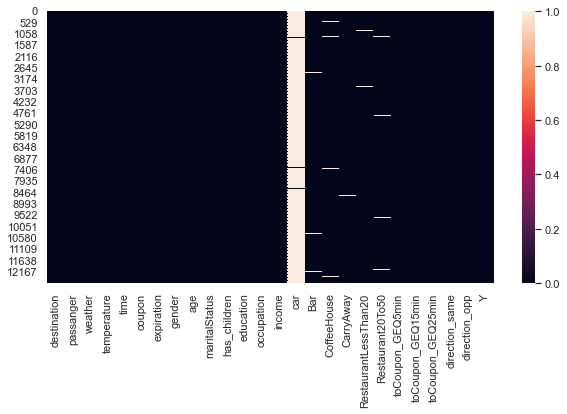

In [11]:
#Check for columns with missing data 

missing_columns = data.columns[data.isnull().any()].values
total_missing_columns = np.count_nonzero(data.isnull().sum())
print('Number of Columns with missing values: ', total_missing_columns, ' names of features: ', missing_columns)

#Visually inspect to verify whether there is missing data using a heatmap


sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(data.isnull())

3. Decide what to do about your missing data -- drop, replace, other...

##### There are some missing values in several columns as can be seen from 11.  'car' column has 108 non-null values, which means more than 99% of the values are marked as "NaN". So this column can be dropped. The data given is  insufficient for any kind of analysis, so it is best to remove this column. 

In [12]:
#Counts of unique values in the Car series

print(analyze["car"].value_counts())

#dropping the car series from the dataframe
analyze.drop('car', inplace=True, axis=1)

analyze.info()

do not drive                                22
Mazda5                                      22
Scooter and motorcycle                      22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684

In [13]:

profile = ProfileReport(analyze, title="Coupon Usage Dataset Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
profile.to_file("Module5_DataProfilingReport.ShajiR.Nathan.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]